<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [6]:
!pip install numpy==1.16.1


     |████████████████████████████████| 17.3MB 23.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
import numpy as np

In [0]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [3]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old 

In [9]:
# TODO - your code!

from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 19s 3ms/step - loss: 2.6276 - acc: 0.3320 - val_loss: 2.3740 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 16s 2ms/step - loss: 2.3252 - acc: 0.3848 - val_loss: 2.2452 - val_acc: 0.4011
Epoch 3/10
6287/6287 [==============================] - 16s 2ms/step - loss: 1.8991 - acc: 0.5153 - val_loss: 2.1396 - val_acc: 0.4419
Epoch 4/10
6287/6287 [==============================] - 16s 3ms/step - loss: 1.2966 - acc: 0.6728 - val_loss: 2.1625 - val_acc: 0.4653
Epoch 5/10
6287/6287 [==============================] - 16s 2ms/step - loss: 0.8164 - acc: 0.8279 - val_loss: 2.1720 - val_acc: 0.4787
Epoch 6/10
6287/6287 [==============================] - 16s 2ms/step - loss: 0.5466 - acc: 0.8960 - val_loss: 2.2385 - val_acc: 0.4809
Epoch 7/10
6287/6287 [==============================] - 16s 2ms/step - loss: 0.3672 - acc: 0.9399 - val_loss: 2.4635 - val_acc: 0.4508
Epoch 8

In [19]:
score, acc = model.evaluate(input_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

2246/2246 [==============================] - 2s 977us/step
Test score: 2.4980509128298807
Test accuracy: 0.479519145173466


Conclusion - RNN runs, and gives pretty decent improvement over a naive model. To *really* improve the model, more playing with parameters would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [4]:
!pip install google_images_download

     |████████████████████████████████| 911kB 38.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [6]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 5.PKLS4116.png

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# TODO - your code!

import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'frog':
      return entry[2]
  return 0.0

In [0]:
import requests

image_urls = ["https://www.enchantedlearning.com/pgifs/Pondanimals.GIF",
              "https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg",
              "https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png",
              "https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg",
              "https://pklifescience.com/staticfiles/articles/images/PKLS4116.png"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

W0726 16:35:49.745572 140439524853632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0726 16:35:49.809458 140439524853632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



40960/35363 [==================================] - 0s 0us/step
[('n03598930', 'jigsaw_puzzle', 0.8680313), ('n06359193', 'web_site', 0.06410018), ('n02834397', 'bib', 0.021264324)]
0.0


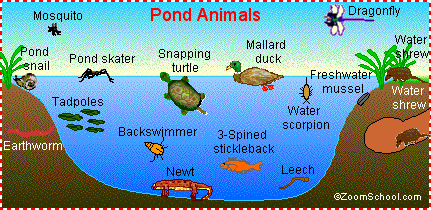

In [15]:
from IPython.display import Image

print(img_contains_frog(process_img_path('example0.jpg')))
Image(filename='example0.jpg', width=500)

[('n01443537', 'goldfish', 0.8495859), ('n01631663', 'eft', 0.067602046), ('n02536864', 'coho', 0.035163548)]
0.0


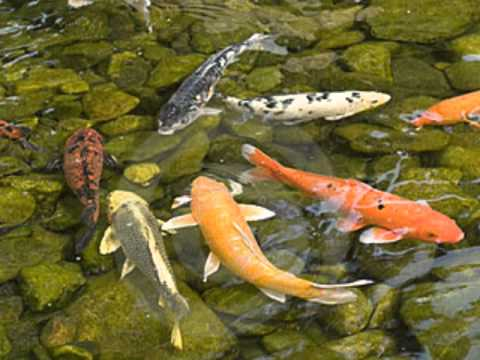

In [16]:
print(img_contains_frog(process_img_path('example1.jpg')))
Image(filename='example1.jpg', width=500)

[('n02442845', 'mink', 0.30976582), ('n02363005', 'beaver', 0.23398991), ('n02361337', 'marmot', 0.2079679)]
0.0


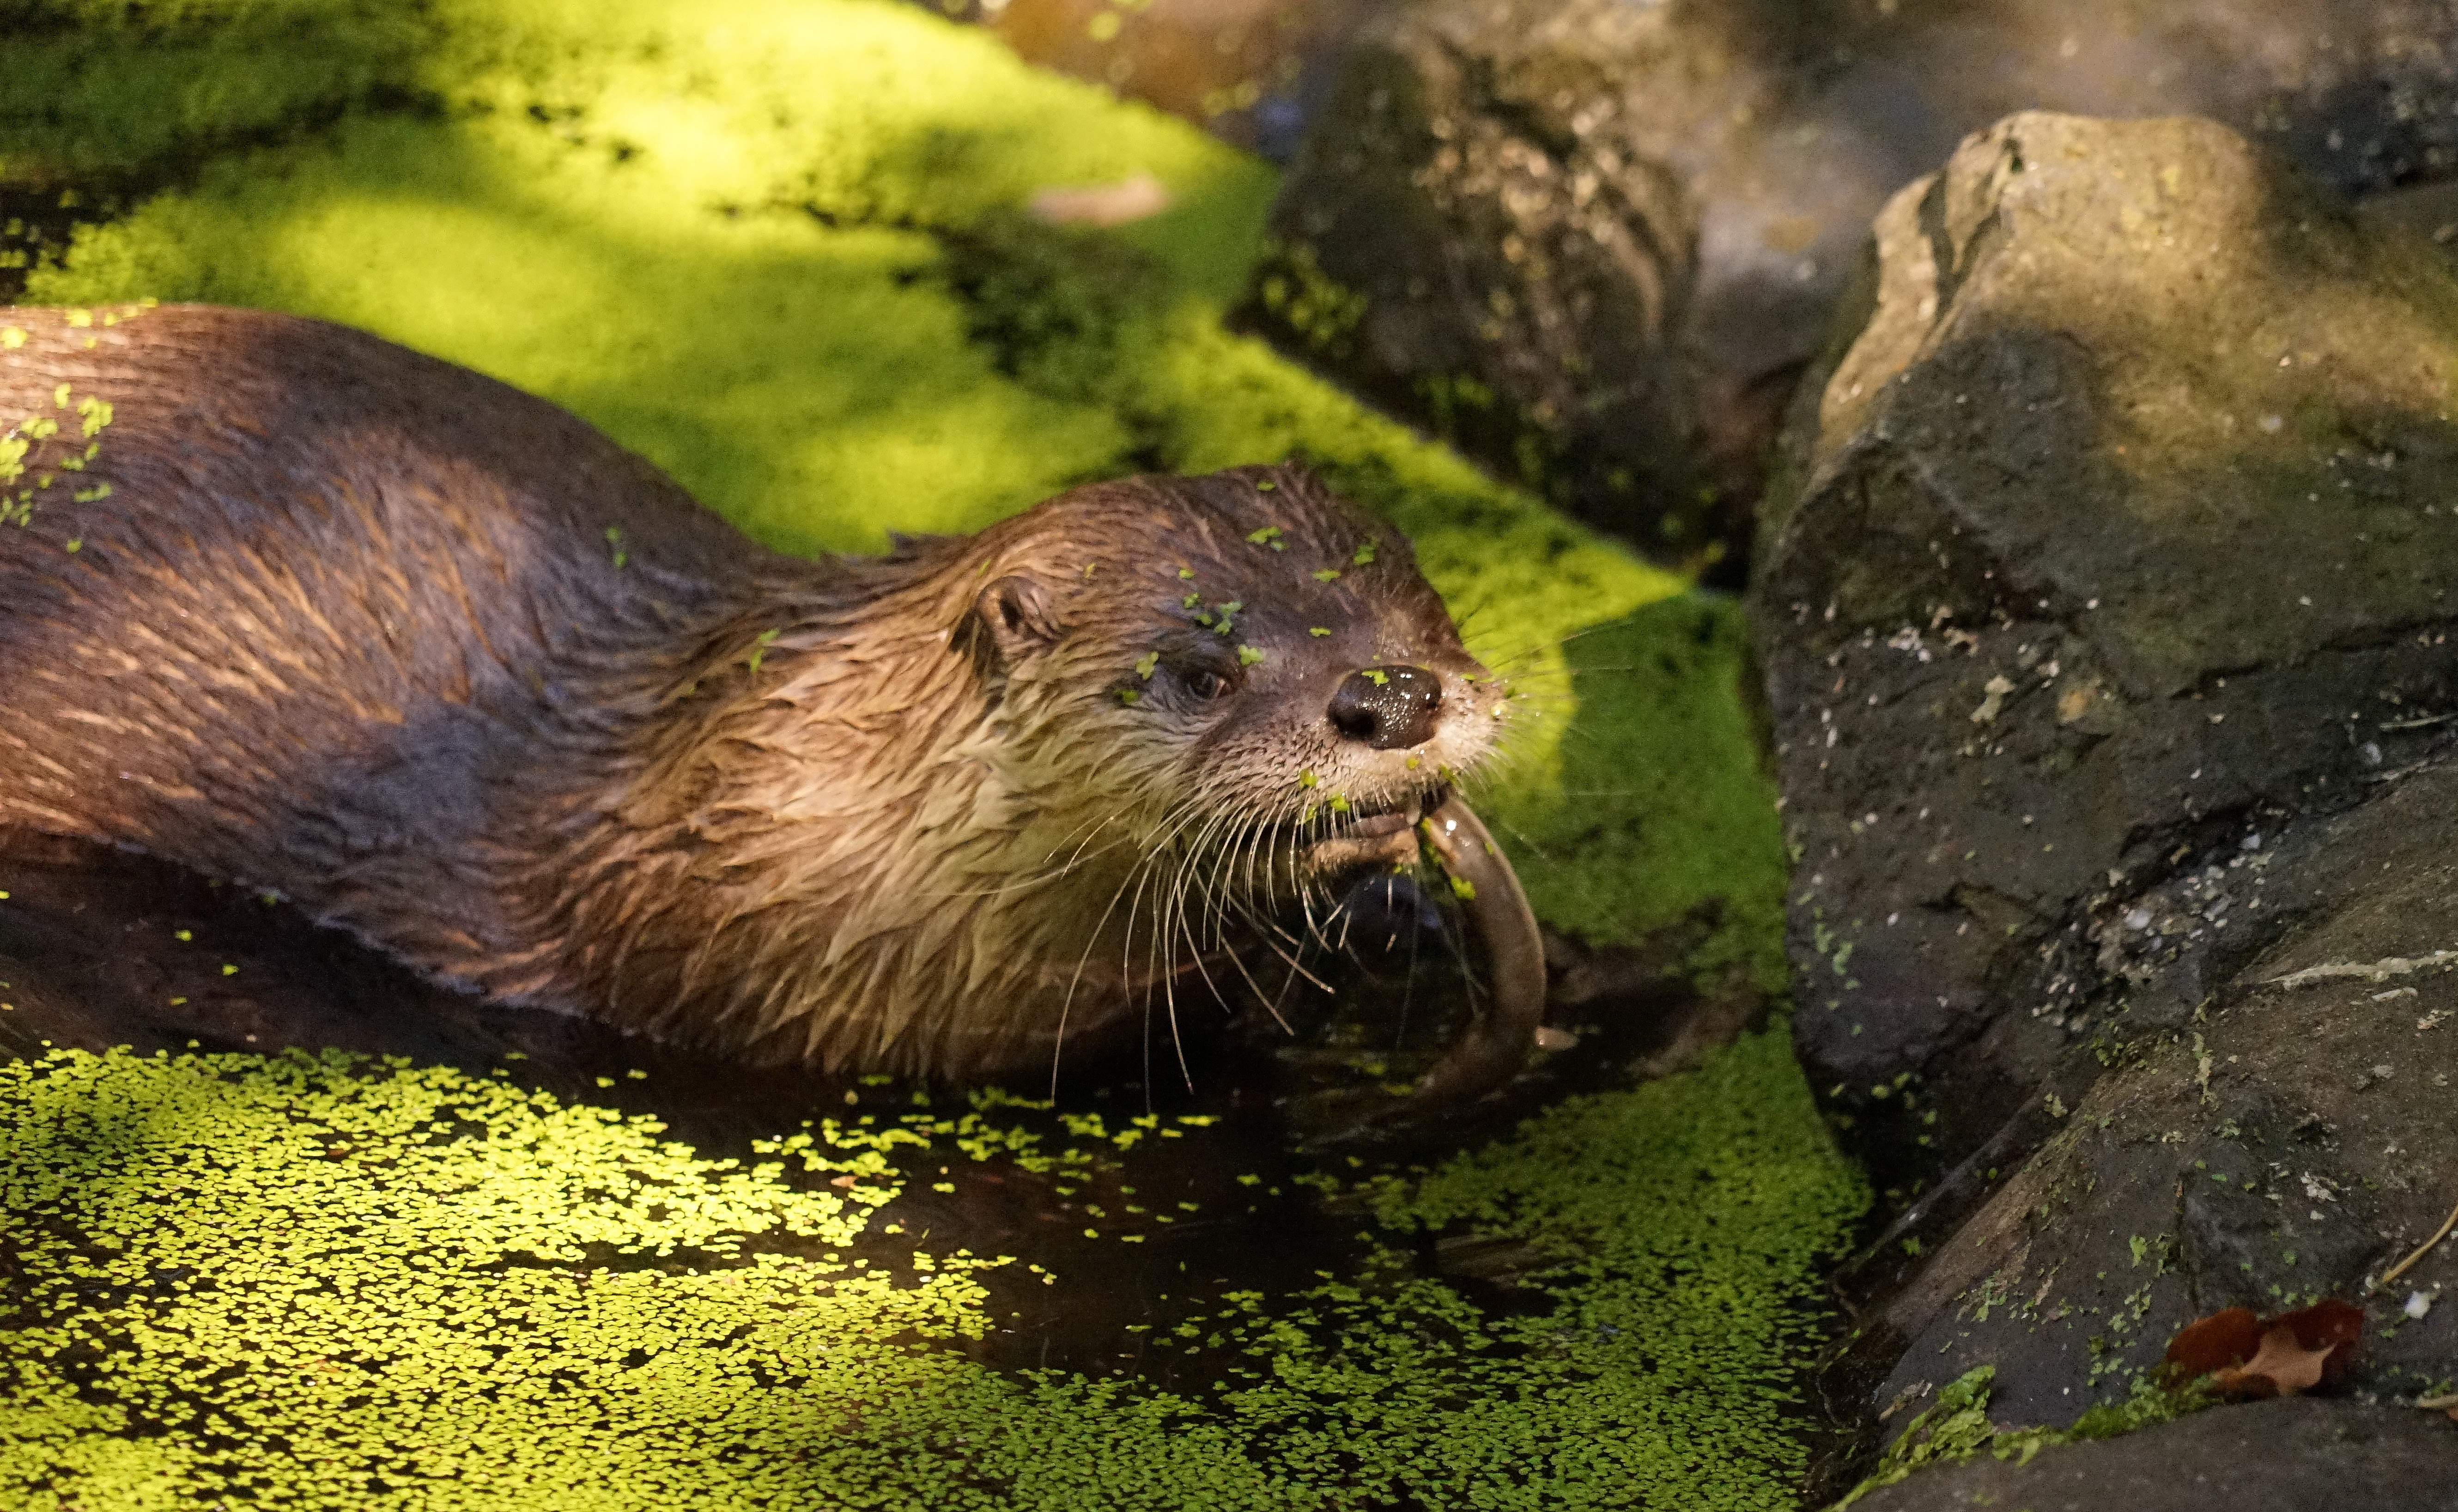

In [17]:
print(img_contains_frog(process_img_path('example3.jpg')))
Image(filename='example3.jpg', width=500)

<a id="p3"></a>
## Part 3 - Generative Adverserial Networks (GANS)

Describe the difference between a discriminator and generator in a GAN in your own words.

__*Your Answer:*__ 


A discriminator is essentially a classifier; i.e. the last layer of the neural network spits out classifications based on the input data. 

A generator algorithm predicts features based on a label; i.e. it tries to generate input data based on what the ultimate label was. The GAN methodology is to have the generator predict features that the discriminator must appropriately classify; if the discriminator fails on a particular item, you know you have to train it better on those items (or features). 



<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Probably the underlying mathematics and statistics: I know enough to take most of the models with a grain of salt, and to be exceedingly careful about which measure of error or fit is used. Neural networks obviate this to some degree, but I think even there custom modifications of gradient descent approaches could conceivably be useful.

We did not learn about this in the course, but I also think there are really interesting techniques such as computational homology and conformal prediction which could be more robust to small data sets. I'd love to use my math background to get into implementing these kinds of techniques.


- What area of Data Science would you most like to learn more about, and why?

Data engineering and its intersection with distributed systems. If, as it seems, most of the progress in machine learning and AI is driven by improvements in hardware, then efficient exploitation of that hardware is probably the most valuable thing we can do on the software end. 


- Where do you think Data Science will be in 5 years?

Probably diffused throughout the workforce to a much greater degree. Whereas the Excel monkey was the modal educated white collar worker in the past (e.g. finance, consulting) in today's world it's likely that table stakes will evolve to be pandas and SQL.

- What are the treats posed by AI to our society?

At the moment, none whatsoever. However, the creation of machine learning systems that can, from anonymized data, accurately discern who individuals are, is quite worrying. Privacy is already being attentuated in pernicious ways. Similarly, statistical learning techniques are only as good as the data they have; various biases and prejudices are likely to be baked in.

- How do you think we can counteract those threats? 

On privacy, I honestly have no idea. A trite but common answer is to invoke blockchain, but that seems to me a partial answer at best. 

Regarding biases in data, I think better education in statistics and probability theory are necessary.


- Do you think achieving General Artifical Intelligence is ever possible?

Yes and no. I do think machine learning systems sufficiently sophisticated across multiple domains  could be either independent menaces or adjuncts to totalitarianism (see Chinese use of cameras). 

I do not think that these machine learning systems will ever resemble human consciousness or "general intelligence." The touchstone for this argument are found in Lucas' paper "Minds, Machines, and Godel," though Penrose has also opined on the topic. Essentially, any computational system more sophisticated than that required to produce arithmetic features an infinite number of unprovable propositions which are provable to human consciousness, suggesting there is an infinite gap between consciousness and computation. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")